In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from qiskit.visualization import plot_histogram, plot_bloch_vector
from math import sqrt, pi

In [2]:
# create a circuit with one qubit

qc = QuantumCircuit(1)
# cnange the initial state from 0 to 1

initial_state = [0,1]
qc.initialize(initial_state, 0)
qc.draw(initial_state=True)

┌─────────────────┐
q: |0>┤ Initialize(0,1) ├
      └─────────────────┘

In [4]:
sim = Aer.get_backend('aer_simulator')
# save a statevector
qc.save_statevector()
# creates a Qobject for the simulator
qobj = assemble(qc)
result = sim.run(qobj).result()

# get the output, e.g. a final state vector of the system
output = result.get_statevector()
print(output)

[0.+0.j 1.+0.j]


In [5]:
qc.measure_all()
qc.draw(initial_state=True)

┌─────────────────┐ ░  ░ ┌─┐
    q: |0>┤ Initialize(0,1) ├─░──░─┤M├
          └─────────────────┘ ░  ░ └╥┘
meas: 0 1/══════════════════════════╩═
                                    0

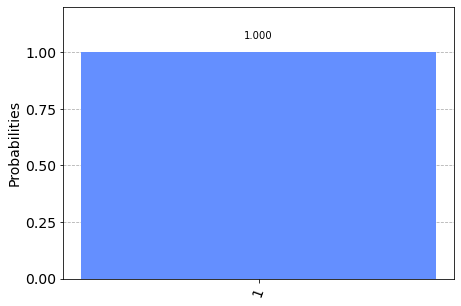

In [6]:
counts = result.get_counts()

plot_histogram(counts)

In [7]:
# customize initial state

qc1 = QuantumCircuit(1)
initial_state = [1/sqrt(2), 1j/sqrt(2)]
qc1.initialize(initial_state, 0)
qc1.save_statevector()
qobj = assemble(qc1)
state=sim.run(qobj).result()
state_vector = state.get_statevector()
print(state_vector)


[0.70710678+0.j         0.        +0.70710678j]


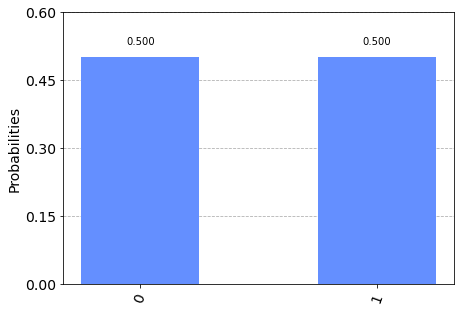

In [8]:
counts = state.get_counts()
plot_histogram(counts)

Quick Exercise

1. Create a state vector that will give a 1/3 probability of measuring |0⟩.
2. Create a different state vector that will give the same measurement probabilities.
3. Verify that the probability of measuring |1⟩for these two states is 2/3.

In [19]:
qc_test = QuantumCircuit(1)
initial_statevector = [1/sqrt(3), 1j/sqrt(3/2)]
qc_test.initialize(initial_statevector, 0)
qc_test.save_statevector()

qobj_test = assemble(qc_test)
result = sim.run(qobj_test).result()
state_vector = result.get_statevector()

state_vector

array([0.57735027+0.j        , 0.        +0.81649658j])

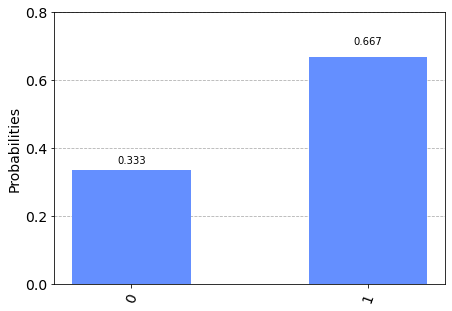

In [20]:
counts = result.get_counts()
plot_histogram(counts)

In [21]:
# Run the code in this cell to interact with the widget
from qiskit_textbook.widgets import state_vector_exercise
state_vector_exercise(target=1/3)

HTML(value='<pre></pre>')

In [22]:
qc = QuantumCircuit(1) # We are redefining qc
initial_state = [0.+1.j/sqrt(2),1/sqrt(2)+0.j]
qc.initialize(initial_state, 0)
qc.draw()
qc.save_statevector()
result = sim.run(assemble(qc)).result()
state = result.get_statevector()
print("Qubit State = " + str(state))

Qubit State = [0.        +0.70710678j 0.70710678+0.j        ]


In [23]:
qc = QuantumCircuit(1) # We are redefining qc
initial_state = [0.+1.j/sqrt(2),1/sqrt(2)+0.j]
qc.initialize(initial_state, 0)
qc.measure_all()
qc.save_statevector()
qc.draw()

┌──────────────────────────────┐ ░ ┌─┐ ░ 
     q: ┤ Initialize(0.70711j,0.70711) ├─░─┤M├─░─
        └──────────────────────────────┘ ░ └╥┘ ░ 
meas: 1/════════════════════════════════════╩════
                                            0

In [24]:
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
print("State of Measured Qubit = " + str(state))

State of Measured Qubit = [0.+1.j 0.+0.j]


## Bloch Sphere

In [25]:
from qiskit_textbook.widgets import plot_bloch_vector_spherical
coords = [pi/2,0,1] # [Theta, Phi, Radius]
plot_bloch_vector_spherical(coords) # Bloch Vector with spherical coordinates

AttributeError: 'Arrow3D' object has no attribute '_path2d'

<Figure size 360x360 with 1 Axes>